# Sales Data Analysis

This huge data is about sales of different accessories throughout the whole year of 2019. In this project, We will know about differents trends and Visualisation data is showing and then on that basis we will make data driven decisions. Moreover we will use different functions to clean the data as far as possible because cleaned data will be more efficient for our analysis and moreover we will see that python or more precisely Jupyter Notebook is the only tool with which we can use in place of SQL or spreadsheets. So let's begin this adventure !!!!

### How to run the code

This is an executable [*Jupyter notebook*](https://jupyter.org) hosted on [Jovian.ml](https://www.jovian.ml), a platform for sharing data science projects. You can run and experiment with the code in a couple of ways: *using free online resources* (recommended) or *on your own computer*.

#### Option 1: Running using free online resources (1-click, recommended)

The easiest way to start executing this notebook is to click the "Run" button at the top of this page, and select "Run on Binder". This will run the notebook on [mybinder.org](https://mybinder.org), a free online service for running Jupyter notebooks. You can also select "Run on Colab" or "Run on Kaggle".


#### Option 2: Running on your computer locally

1. Install Conda by [following these instructions](https://conda.io/projects/conda/en/latest/user-guide/install/index.html). Add Conda binaries to your system `PATH`, so you can use the `conda` command on your terminal.

2. Create a Conda environment and install the required libraries by running these commands on the terminal:

```
conda create -n zerotopandas -y python=3.8 
conda activate zerotopandas
pip install jovian jupyter numpy pandas matplotlib seaborn opendatasets --upgrade
```

3. Press the "Clone" button above to copy the command for downloading the notebook, and run it on the terminal. This will create a new directory and download the notebook. The command will look something like this:

```
jovian clone notebook-owner/notebook-id
```



4. Enter the newly created directory using `cd directory-name` and start the Jupyter notebook.

```
jupyter notebook
```

You can now access Jupyter's web interface by clicking the link that shows up on the terminal or by visiting http://localhost:8888 on your browser. Click on the notebook file (it has a `.ipynb` extension) to open it.


## Downloading the Dataset

**TODO** - add some explanation here

In [8]:
!pip install jovian opendatasets --upgrade --quiet

Let's begin by downloading the data, and listing the files within the dataset.

In [6]:
# Change this
dataset_url = 'https://www.kaggle.com/tunguz/us-elections-dataset' 

In [15]:
import opendatasets as od
od.download(dataset_url)

Kaggle dataset ID:  tunguz/us-elections-dataset


0it [00:00, ?it/s]

37806080it [00:03, 12417556.13it/s]                              


Extracting archive ./us-elections-dataset.zip to ./us-elections-dataset


The dataset has been downloaded and extracted.

In [1]:
import os
os.listdir()

['.bash_logout',
 '.profile',
 '.bashrc',
 '.ipynb_checkpoints',
 '.ipython',
 '.local',
 '.cache',
 'zerotopandas-course-project.ipynb',
 'sales_data.csv',
 '.jupyter',
 '.jovian',
 '.config',
 '.conda',
 '.wget-hsts',
 '.jovianrc',
 '.git',
 'work',
 '.npm']

Let us save and upload our work to Jovian before continuing.

In [2]:
project_name = "sales_data_analysis" # change this (use lowercase letters and hyphens only)

In [3]:
!pip install jovian --upgrade -q

In [4]:
import jovian

<IPython.core.display.Javascript object>

In [ ]:
jovian.commit(project=project_name)

<IPython.core.display.Javascript object>

## Data Preparation and Cleaning

**TODO** - Here we will clean all the useless data that could create chaos and bias in our data driven decision 



In [2]:
import os
import pandas as pd

In [3]:
sales_data = pd.read_csv("sales_data.csv")
sales_data.head(7)

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,194095,Wired Headphones,1,11.99,05/16/19 17:14,"669 2nd St, New York City, NY 10001"
1,194096,AA Batteries (4-pack),1,3.84,05/19/19 14:43,"844 Walnut St, Dallas, TX 75001"
2,194097,27in FHD Monitor,1,149.99,05/24/19 11:36,"164 Madison St, New York City, NY 10001"
3,194098,Wired Headphones,1,11.99,05/02/19 20:40,"622 Meadow St, Dallas, TX 75001"
4,194099,AAA Batteries (4-pack),2,2.99,05/11/19 22:55,"17 Church St, Seattle, WA 98101"
5,194100,iPhone,1,700.0,05/10/19 19:44,"81 Jefferson St, San Francisco, CA 94016"
6,194101,USB-C Charging Cable,1,11.95,05/11/19 22:44,"354 Meadow St, Boston, MA 02215"


In [123]:
#Clean up the data!
#Drop rows of NAN
# Find NAN
nan_df = sales_data[sales_data.isna().any(axis=1)]
display(nan_df.head())

sales_data = sales_data.dropna(how='all')
sales_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
58,NaN,NaN,NaN,NaN,NaN,NaN
111,NaN,NaN,NaN,NaN,NaN,NaN
522,NaN,NaN,NaN,NaN,NaN,NaN
839,NaN,NaN,NaN,NaN,NaN,NaN
1590,NaN,NaN,NaN,NaN,NaN,NaN


,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,194095,Wired Headphones,1,11.99,05/16/19 17:14,"669 2nd St, New York City, NY 10001"
1,194096,AA Batteries (4-pack),1,3.84,05/19/19 14:43,"844 Walnut St, Dallas, TX 75001"
2,194097,27in FHD Monitor,1,149.99,05/24/19 11:36,"164 Madison St, New York City, NY 10001"
3,194098,Wired Headphones,1,11.99,05/02/19 20:40,"622 Meadow St, Dallas, TX 75001"
4,194099,AAA Batteries (4-pack),2,2.99,05/11/19 22:55,"17 Church St, Seattle, WA 98101"


In [124]:
#Delete useless Text in Order Date Column
sales_data = sales_data[sales_data['Order Date'].str[0:2]!='Or']

In [125]:
#Set Correct Data Types
sales_data['Quantity Ordered'] = pd.to_numeric(sales_data['Quantity Ordered'])
sales_data['Price Each'] = pd.to_numeric(sales_data['Price Each'])

In [126]:
#Add a new Column named as Month
sales_data['Month'] = sales_data['Order Date'].str[0:2]
sales_data['Month'] = sales_data['Month'].astype('int32')
sales_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month
0,194095,Wired Headphones,1,11.99,05/16/19 17:14,"669 2nd St, New York City, NY 10001",5
1,194096,AA Batteries (4-pack),1,3.84,05/19/19 14:43,"844 Walnut St, Dallas, TX 75001",5
2,194097,27in FHD Monitor,1,149.99,05/24/19 11:36,"164 Madison St, New York City, NY 10001",5
3,194098,Wired Headphones,1,11.99,05/02/19 20:40,"622 Meadow St, Dallas, TX 75001",5
4,194099,AAA Batteries (4-pack),2,2.99,05/11/19 22:55,"17 Church St, Seattle, WA 98101",5


In [127]:
#Add a new Column named as City
def city(address):
    return address.split(",")[1].strip(" ")

def state(address):
    return address.split(",")[2].split(" ")[1]

sales_data['City'] = sales_data['Purchase Address'].apply(lambda x: f"{city(x)}  ({state(x)})")
sales_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,City
0,194095,Wired Headphones,1,11.99,05/16/19 17:14,"669 2nd St, New York City, NY 10001",5,New York City (NY)
1,194096,AA Batteries (4-pack),1,3.84,05/19/19 14:43,"844 Walnut St, Dallas, TX 75001",5,Dallas (TX)
2,194097,27in FHD Monitor,1,149.99,05/24/19 11:36,"164 Madison St, New York City, NY 10001",5,New York City (NY)
3,194098,Wired Headphones,1,11.99,05/02/19 20:40,"622 Meadow St, Dallas, TX 75001",5,Dallas (TX)
4,194099,AAA Batteries (4-pack),2,2.99,05/11/19 22:55,"17 Church St, Seattle, WA 98101",5,Seattle (WA)


In [128]:
import jovian

In [129]:
jovian.commit()

<IPython.core.display.Javascript object>

[jovian] Updating notebook "mohammadowaisprofessional/sales-data-analysis" on https://jovian.ai
[jovian] Committed successfully! https://jovian.ai/mohammadowaisprofessional/sales-data-analysis


'https://jovian.ai/mohammadowaisprofessional/sales-data-analysis'

## Exploratory Analysis and Visualization

**TODO** - Here we will ask some questions about data and check wether data is giving us right answers or appropriate answers



Let's begin by importing`matplotlib.pyplot` and `seaborn`.

In [130]:
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

sns.set_style('darkgrid')
matplotlib.rcParams['font.size'] = 14
matplotlib.rcParams['figure.figsize'] = (9, 5)
matplotlib.rcParams['figure.facecolor'] = '#00000000'

**TODO** - Explore one or more columns by plotting a graph below, and add some explanation about it

In [131]:
#In which month sales was highest??
sales_data['Sales'] = sales_data['Quantity Ordered'].astype('int') * sales_data['Price Each'].astype('float')
sales_data.groupby(['Month']).sum()

,Quantity Ordered,Price Each,Sales
Month,,,
1,21806,3623536.76,3644513.46
2,26898,4377769.44,4404044.84
3,34010,5582415.66,5614200.76
4,41116,6735342.04,6781340.48
5,37334,6270250.26,6305213.50
6,30506,5124051.22,5155604.52
7,32144,5265079.12,5295551.52
8,26896,4460690.84,4488935.76
9,26218,4169984.18,4195120.26


range(1, 13)


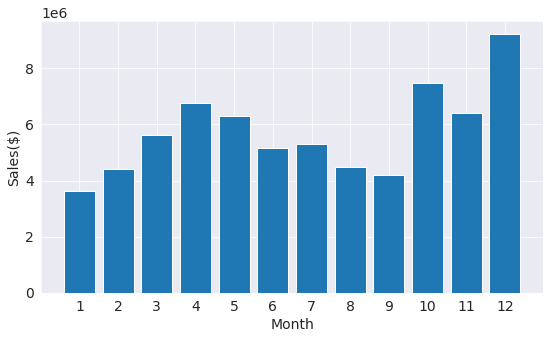

In [132]:
import matplotlib.pyplot as plt

months = range(1,13)
print(months)

plt.bar(months,sales_data.groupby(['Month']).sum()['Sales'])
plt.xticks(months)
plt.ylabel('Sales($)')
plt.xlabel('Month')
plt.show()

**TODO** - Explore one or more columns by plotting a graph below, and add some explanation about it

In [133]:
#In which city most product was sold???
sales_data.groupby(['City']).sum()

,Quantity Ordered,Price Each,Month,Sales
City,,,,
Atlanta (GA),33204,5559816.40,209588,5590997.16
Austin (TX),22306,3619747.22,139658,3639163.50
Boston (MA),45056,7274819.54,282224,7323284.02
Dallas (TX),33460,5505255.64,209240,5535950.80
Los Angeles (CA),66578,10842870.46,416650,10905141.60
New York City (NY),55864,9270741.66,351482,9328634.86
Portland (ME),5500,894378.50,34288,899516.54
Portland (OR),22606,3721116.44,141242,3741464.68
San Francisco (CA),100478,16422923.48,631040,16524407.82


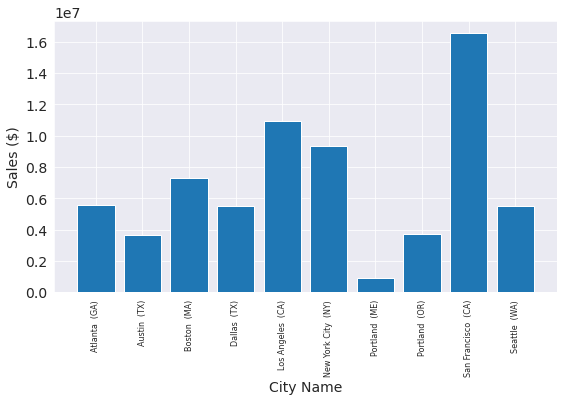

In [134]:
import matplotlib.pyplot as plt

keys = [city for city, df in sales_data.groupby(['City'])]

plt.bar(keys,sales_data.groupby(['City']).sum()['Sales'])
plt.ylabel('Sales ($)')
plt.xlabel('City Name')
plt.xticks(keys, rotation='vertical', size=8)
plt.show()

**TODO** - Explore one or more columns by plotting a graph below, and add some explanation about it

In [135]:
#List of product which was sold most??
sales_data.groupby(['Product']).sum()

,Quantity Ordered,Price Each,Month,Sales
Product,,,,
20in Monitor,8258,902137.98,58672,908297.42
27in 4K Gaming Monitor,12488,4859275.40,88880,4870195.12
27in FHD Monitor,15100,2251949.86,105116,2264849.00
34in Ultrawide Monitor,12398,4697436.38,86608,4711116.02
AA Batteries (4-pack),55270,158031.36,291116,212236.80
AAA Batteries (4-pack),62034,123433.18,292740,185481.66
Apple Airpods Headphones,31322,4664700.00,218954,4698300.00
Bose SoundSport Headphones,26914,2664733.50,188226,2691130.86
Flatscreen TV,9638,2880000.00,68448,2891400.00


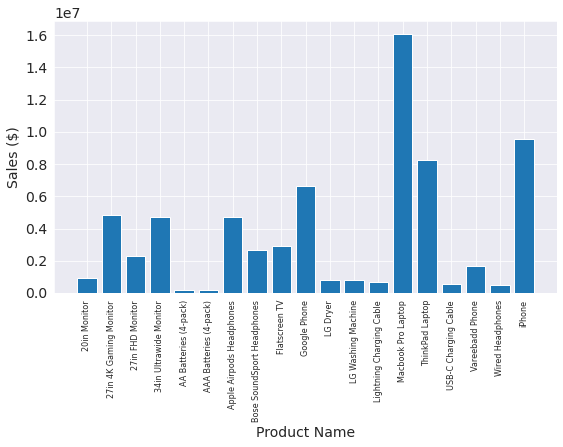

In [136]:
import matplotlib.pyplot as plt

keys = [Product for Product, df in sales_data.groupby(['Product'])]

plt.bar(keys,sales_data.groupby(['Product']).sum()['Sales'])
plt.ylabel('Sales ($)')
plt.xlabel('Product Name')
plt.xticks(keys, rotation='vertical', size=8)
plt.show()

**TODO** - Explore one or more columns by plotting a graph below, and add some explanation about it

In [137]:
#what should be the appropriate time for displaying advertisement which would attract more customer???
sales_data['Hour'] = pd.to_datetime(sales_data['Order Date']).dt.hour
sales_data['Minute'] = pd.to_datetime(sales_data['Order Date']).dt.minute
sales_data['Count'] = 1
sales_data.head()


,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,City,Sales,Hour,Minute,Count
0,194095,Wired Headphones,1,11.99,05/16/19 17:14,"669 2nd St, New York City, NY 10001",5,New York City (NY),11.99,17,14,1
1,194096,AA Batteries (4-pack),1,3.84,05/19/19 14:43,"844 Walnut St, Dallas, TX 75001",5,Dallas (TX),3.84,14,43,1
2,194097,27in FHD Monitor,1,149.99,05/24/19 11:36,"164 Madison St, New York City, NY 10001",5,New York City (NY),149.99,11,36,1
3,194098,Wired Headphones,1,11.99,05/02/19 20:40,"622 Meadow St, Dallas, TX 75001",5,Dallas (TX),11.99,20,40,1
4,194099,AAA Batteries (4-pack),2,2.99,05/11/19 22:55,"17 Church St, Seattle, WA 98101",5,Seattle (WA),5.98,22,55,1


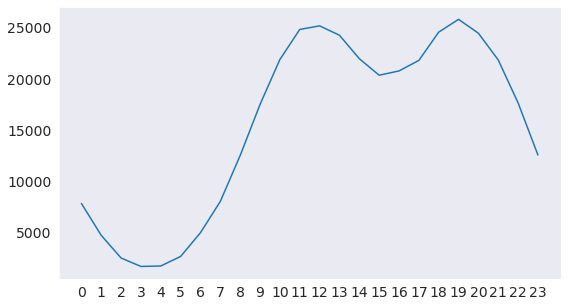

In [138]:
keys = [pair for pair, df in sales_data.groupby(['Hour'])]

plt.plot(keys, sales_data.groupby(['Hour']).count()['Count'])
plt.xticks(keys)
plt.grid()
plt.show()

# I like to go for shopping at 6 pm  evening 

**TODO** - Explore one or more columns by plotting a graph below, and add some explanation about it

In [139]:
#which products are sold in groups more oftenly??
df = sales_data[sales_data['Order ID'].duplicated(keep=False)]\

df['Grouped'] = df.groupby('Order ID')['Product'].transform(lambda x: ','.join(x))
df2 = df[['Order ID', 'Grouped']].drop_duplicates()

In [140]:
#This module implements a number of iterator building blocks inspired by constructs from APL, Haskell, and SML. Each has been recast in a form suitable for Python.

#The module standardizes a core set of fast, memory efficient tools that are useful by themselves or in combination. Together, they form an “iterator algebra” making it possible to construct specialized tools succinctly and efficiently in pure Python.

from itertools import combinations
from collections import Counter

count = Counter()

for row in df2['Grouped']:
    row_list = row.split(',')
    count.update(Counter(combinations(row_list, 2)))

for key,value in count.most_common(10):
    print(key, value)

('USB-C Charging Cable', 'USB-C Charging Cable') 22095
('Lightning Charging Cable', 'Lightning Charging Cable') 21874
('AAA Batteries (4-pack)', 'AAA Batteries (4-pack)') 20833
('AA Batteries (4-pack)', 'AA Batteries (4-pack)') 20717
('Wired Headphones', 'Wired Headphones') 19022
('Apple Airpods Headphones', 'Apple Airpods Headphones') 15645
('Bose SoundSport Headphones', 'Bose SoundSport Headphones') 13433
('27in FHD Monitor', '27in FHD Monitor') 7543
('iPhone', 'iPhone') 6850
('27in 4K Gaming Monitor', '27in 4K Gaming Monitor') 6250


Let us save and upload our work to Jovian before continuing

In [141]:
import jovian

In [142]:
jovian.commit()

<IPython.core.display.Javascript object>

[jovian] Updating notebook "mohammadowaisprofessional/sales-data-analysis" on https://jovian.ai
[jovian] Committed successfully! https://jovian.ai/mohammadowaisprofessional/sales-data-analysis


'https://jovian.ai/mohammadowaisprofessional/sales-data-analysis'

## Asking and Answering Questions

TODO - write some explanation here.



#### Q1: In which month sales was highest ?

In [143]:
sales_data.groupby(['Month']).sum()

,Quantity Ordered,Price Each,Sales,Hour,Minute,Count
Month,,,,,,
1,21806,3623536.76,3644513.46,278970,564880,19418
2,26898,4377769.44,4404044.84,345338,709770,23950
3,34010,5582415.66,5614200.76,437938,895118,30306
4,41116,6735342.04,6781340.48,524518,1088372,36558
5,37334,6270250.26,6305213.50,477560,975798,33132
6,30506,5124051.22,5155604.52,391056,804872,27108
7,32144,5265079.12,5295551.52,412338,834698,28586
8,26896,4460690.84,4488935.76,344578,707714,23922
9,26218,4169984.18,4195120.26,337026,683396,23242


range(1, 13)


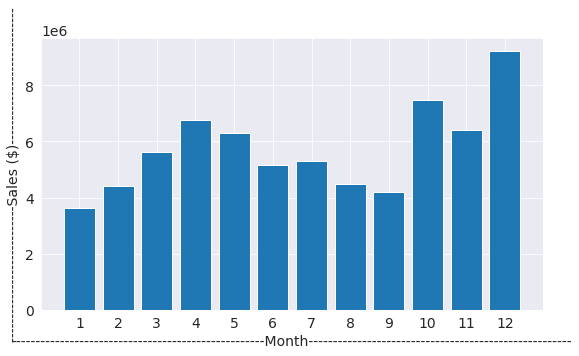

In [144]:
import matplotlib.pyplot as plt

months = range(1,13)
print(months)

plt.bar(months,sales_data.groupby(['Month']).sum()['Sales'])
plt.xticks(months)
plt.ylabel('----------------------------Sales ($)----------------------------')
plt.xlabel('----------------------------------------------------Month------------------------------------------------------')
plt.show()

In [145]:
## As we can see from graph in decembers customers have bought a lot of product!!

#### Q2: Name the city where greatest number of products were sold ?

In [146]:
sales_data.groupby(['City']).sum()

,Quantity Ordered,Price Each,Month,Sales,Hour,Minute,Count
City,,,,,,,
Atlanta (GA),33204,5559816.40,209588,5590997.16,428528,885864,29762
Austin (TX),22306,3619747.22,139658,3639163.50,283892,578120,19810
Boston (MA),45056,7274819.54,282224,7323284.02,576450,1180884,39868
Dallas (TX),33460,5505255.64,209240,5535950.80,428780,870310,29640
Los Angeles (CA),66578,10842870.46,416650,10905141.60,854888,1733276,59210
New York City (NY),55864,9270741.66,351482,9328634.86,715392,1467196,49752
Portland (ME),5500,894378.50,34288,899516.54,70422,145712,4910
Portland (OR),22606,3721116.44,141242,3741464.68,288842,591066,20020
San Francisco (CA),100478,16422923.48,631040,16524407.82,1286530,2638954,89464


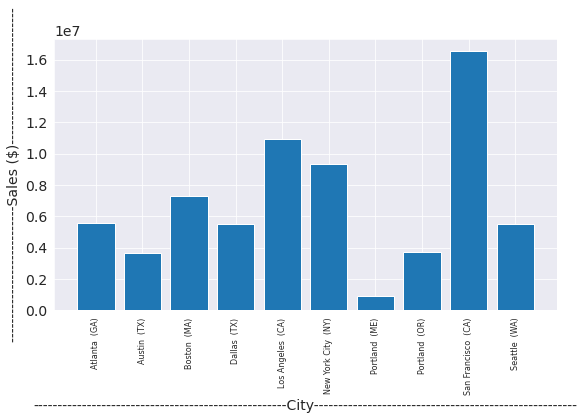

In [147]:
import matplotlib.pyplot as plt

keys = [city for city, df in sales_data.groupby(['City'])]

plt.bar(keys,sales_data.groupby(['City']).sum()['Sales'])
plt.ylabel('----------------------------Sales ($)----------------------------')
plt.xlabel('----------------------------------------------------City------------------------------------------------------')
plt.xticks(keys, rotation='vertical', size=8)
plt.show()

In [148]:
## As we can see from graph San Francisco was the place where customers bought greatest

#### Q3: list the products that were sold most??

In [149]:
sales_data.groupby(['Product']).sum()

,Quantity Ordered,Price Each,Month,Sales,Hour,Minute,Count
Product,,,,,,,
20in Monitor,8258,902137.98,58672,908297.42,117528,244504,8202
27in 4K Gaming Monitor,12488,4859275.40,88880,4870195.12,181832,368662,12460
27in FHD Monitor,15100,2251949.86,105116,2264849.00,215080,439896,15014
34in Ultrawide Monitor,12398,4697436.38,86608,4711116.02,178152,366960,12362
AA Batteries (4-pack),55270,158031.36,291116,212236.80,596684,1218078,41154
AAA Batteries (4-pack),62034,123433.18,292740,185481.66,594664,1224226,41282
Apple Airpods Headphones,31322,4664700.00,218954,4698300.00,446608,911140,31098
Bose SoundSport Headphones,26914,2664733.50,188226,2691130.86,384890,785206,26650
Flatscreen TV,9638,2880000.00,68448,2891400.00,137630,285578,9600


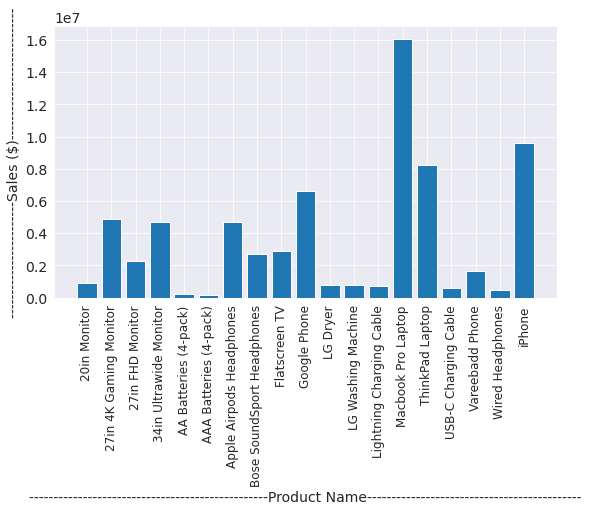

In [150]:
import matplotlib.pyplot as plt

keys = [Product for Product, df in sales_data.groupby(['Product'])]

plt.bar(keys,sales_data.groupby(['Product']).sum()['Sales'])
plt.ylabel('------------------------Sales ($)---------------------------')
plt.xlabel('-------------------------------------------------Product Name--------------------------------------------')
plt.xticks(keys, rotation='vertical', size=12)
plt.show()

In [151]:
## As we can see from graph Mackbook Pro Laptop was most sold product of 2019

#### Q4: what should be the appropriate time for displaying advertisement which would attract more customer???

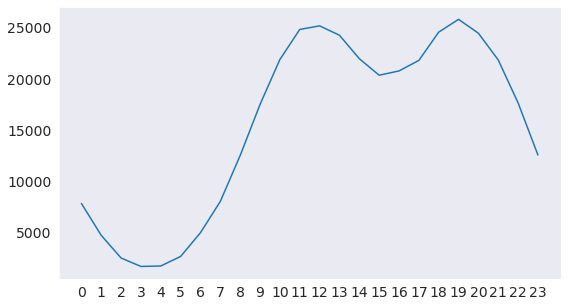

In [152]:
keys = [pair for pair, df in sales_data.groupby(['Hour'])]

plt.plot(keys, sales_data.groupby(['Hour']).count()['Count'])
plt.xticks(keys)
plt.grid()
plt.show()

In [153]:
#I like to go for shopping at 6pm evening

#### Q5: which products are sold in groups more oftenly??

In [154]:
df = sales_data[sales_data['Order ID'].duplicated(keep=False)]\

df['Grouped'] = df.groupby('Order ID')['Product'].transform(lambda x: ','.join(x))
df2 = df[['Order ID', 'Grouped']].drop_duplicates()

In [155]:
from itertools import combinations
from collections import Counter

count = Counter()

for row in df2['Grouped']:
    row_list = row.split(',')
    count.update(Counter(combinations(row_list, 2)))

for key,value in count.most_common(10):
    print(key, value)

('USB-C Charging Cable', 'USB-C Charging Cable') 22095
('Lightning Charging Cable', 'Lightning Charging Cable') 21874
('AAA Batteries (4-pack)', 'AAA Batteries (4-pack)') 20833
('AA Batteries (4-pack)', 'AA Batteries (4-pack)') 20717
('Wired Headphones', 'Wired Headphones') 19022
('Apple Airpods Headphones', 'Apple Airpods Headphones') 15645
('Bose SoundSport Headphones', 'Bose SoundSport Headphones') 13433
('27in FHD Monitor', '27in FHD Monitor') 7543
('iPhone', 'iPhone') 6850
('27in 4K Gaming Monitor', '27in 4K Gaming Monitor') 6250


In [156]:
## As we can see from graph USB-C Charging Cables are most oftenly sold in group

Let us save and upload our work to Jovian before continuing.

In [157]:
import jovian

In [158]:
jovian.commit()

<IPython.core.display.Javascript object>

[jovian] Updating notebook "mohammadowaisprofessional/sales-data-analysis" on https://jovian.ai
[jovian] Committed successfully! https://jovian.ai/mohammadowaisprofessional/sales-data-analysis


'https://jovian.ai/mohammadowaisprofessional/sales-data-analysis'

## Inferences and Conclusion

**TODO** - Through all data analysis I did above I learned a first hand experience of dealing with data, How to make data driven decisions with the help of data and try to be unbiased as far as possible throughout data and that's it !!!

https://docs.python.org/3/library/itertools.html

In [159]:
import jovian

In [ ]:
jovian.commit()

<IPython.core.display.Javascript object>

## References and Future Work

**TODO** - I found sales data from github which was really huge and dealing with huge data increase your experience with dealing problems

https://docs.python.org/3/library/itertools.html

In [ ]:
import jovian

In [ ]:
jovian.commit()